In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_sub = pd.read_csv('datasets/sample_submission.csv')

In [3]:
data_all = pd.concat([train_data, test_data], ignore_index = True, sort = False)

In [5]:
print(data_all.shape, train_data.shape, test_data.shape)

(151924, 29) (116058, 29) (35866, 28)


In [6]:
data_all.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1.0
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1.0


In [7]:
data_all.tail(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
151914,35857,X,OTHER,4.250,240000,360,01/01/12,Mar-12,73,2.0,38.0,803.0,C86,0.0,799.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151915,35858,X,Browning-Hart,4.000,304000,360,01/02/12,May-12,80,1.0,22.0,776.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151916,35859,X,Browning-Hart,4.125,79000,180,01/02/12,Apr-12,64,1.0,44.0,764.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151917,35860,X,OTHER,4.000,237000,360,01/01/12,Mar-12,64,1.0,45.0,698.0,B12,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
151918,35861,Y,Browning-Hart,3.250,226000,180,01/02/12,Apr-12,80,2.0,24.0,791.0,A23,0.0,781.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151919,35862,X,OTHER,4.125,232000,240,01/01/12,Apr-12,80,2.0,30.0,684.0,C86,0.0,712.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151920,35863,Z,Edwards-Hoffman,3.375,204000,180,01/01/12,Mar-12,80,1.0,30.0,812.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151921,35864,X,Browning-Hart,4.250,200000,360,01/02/12,Apr-12,52,2.0,38.0,624.0,B12,0.0,646.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
151922,35865,Y,Edwards-Hoffman,4.375,400000,360,01/02/12,Apr-12,66,1.0,34.0,753.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151923,35866,X,OTHER,4.375,182000,360,01/02/12,Apr-12,70,1.0,3.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [8]:
data_all.sample(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
138510,22453,Y,"Turner, Baldwin and Rhodes",3.250,228000,180,01/02/12,Apr-12,46,1.0,47.0,736.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
148466,32409,X,OTHER,3.250,144000,180,01/02/12,Apr-12,55,2.0,47.0,788.0,A23,0.0,777.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
43340,774373180385,Y,Richards-Walters,3.750,145000,240,2012-01-01,03/2012,56,1.0,37.0,731.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
122443,6386,X,OTHER,4.000,106000,360,01/02/12,Apr-12,80,1.0,28.0,795.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
93806,574754101868,X,OTHER,3.875,310000,360,2012-03-01,05/2012,70,2.0,15.0,722.0,A23,0.0,719.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [9]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151924 entries, 0 to 151923
Data columns (total 29 columns):
loan_id                     151924 non-null int64
source                      151924 non-null object
financial_institution       151924 non-null object
interest_rate               151924 non-null float64
unpaid_principal_bal        151924 non-null int64
loan_term                   151924 non-null int64
origination_date            151924 non-null object
first_payment_date          151924 non-null object
loan_to_value               151924 non-null int64
number_of_borrowers         151924 non-null float64
debt_to_income_ratio        151924 non-null float64
borrower_credit_score       151924 non-null float64
loan_purpose                151924 non-null object
insurance_percent           151924 non-null float64
co-borrower_credit_score    151924 non-null float64
insurance_type              151924 non-null float64
m1                          151924 non-null int64
m2                  

In [11]:
data_all.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.519240e+05,151924.000000,1.519240e+05,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,151924.000000,116058.000000
mean,4.197103e+11,3.869879,2.081173e+05,292.481458,67.421645,1.594040,30.747150,769.926713,2.772860,460.278514,0.003238,0.003113,0.002119,0.001968,0.002139,0.003337,0.003173,0.003976,0.004555,0.005114,0.006365,0.006885,0.007892,0.005480
std,3.255504e+11,0.460908,1.146558e+05,89.653613,17.281065,0.491078,9.729672,42.109207,8.080634,381.798443,0.056815,0.062714,0.053283,0.055763,0.061484,0.080205,0.083153,0.097749,0.108693,0.122103,0.142497,0.158087,0.174150,0.073824
min,1.000000e+00,2.250000,1.100000e+04,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.158882e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103649e+11,3.875000,1.820000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,741.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.040456e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [12]:
data_all.describe(include=['O'])

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,151924,151924,151924,151924,151924
unique,3,19,6,8,3
top,X,OTHER,2012-02-01,04/2012,A23
freq,83572,64861,52334,52840,76354


In [13]:
data_bin = pd.DataFrame()
data_con = pd.DataFrame()

In [14]:
data_bin['m13']=data_all['m13']
data_con['m13']=data_all['m13']

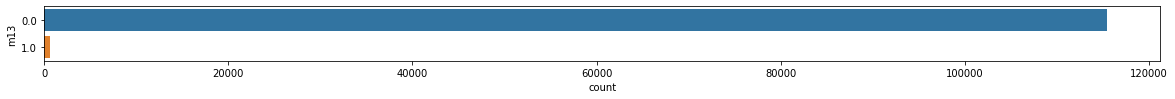

In [17]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="m13", data = data_bin);

In [19]:
data_all['source'].value_counts()

X    83572
Y    49207
Z    19145
Name: source, dtype: int64

In [18]:
data_bin['source'] = data_all['source']
data_con['source'] = data_all['source']

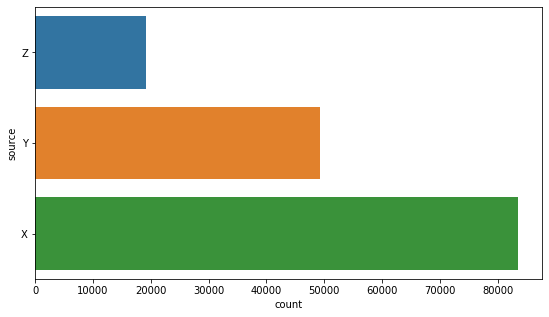

In [24]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(y="source", data = data_bin);

